In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif, VarianceThreshold
from sklearn.impute import SimpleImputer


In [2]:
# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
target_names = iris.target_names
df['target_name'] = df['target'].apply(lambda x: target_names[x])

# Display top 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
# Display info
print("Dataset Info:")
print(df.info())

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Statistical summary
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_name        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866     

In [4]:
# Introduce some missing values for demonstration
np.random.seed(42)
df.loc[df.sample(frac=0.05).index, 'sepal length (cm)'] = np.nan

print("Missing values after introducing some NaNs:")
print(df.isnull().sum())

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
df[['sepal length (cm)']] = imputer.fit_transform(df[['sepal length (cm)']])

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after introducing some NaNs:
sepal length (cm)    8
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

Missing values after imputation:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64


In [5]:
# Encode target variable using LabelEncoder
label_encoder = LabelEncoder()
df['target_encoded'] = label_encoder.fit_transform(df['target_name'])

# Show encoded labels
df[['target_name', 'target_encoded']].drop_duplicates()


,target_name,target_encoded
0,setosa,0
50,versicolor,1
100,virginica,2


In [6]:
# Separate features and target
X = df[iris.feature_names]
y = df['target_encoded']

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=iris.feature_names)

# Display scaled data
X_scaled_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897652,1.019004,-1.340227,-1.315444
1,-1.147342,-0.131979,-1.340227,-1.315444
2,-1.397032,0.328414,-1.397064,-1.315444
3,-1.521877,0.098217,-1.283389,-1.315444
4,-1.022497,1.249201,-1.340227,-1.315444


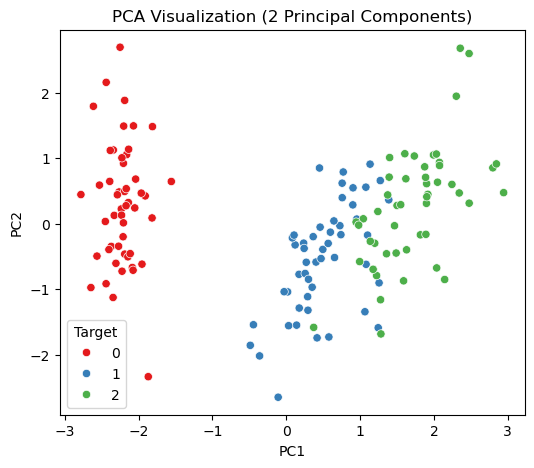

Explained Variance by PCA: [0.72222088 0.23222325]


In [7]:
# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

# Create PCA DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y

# Visualize PCA components
plt.figure(figsize=(6,5))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=pca_df, palette='Set1')
plt.title("PCA Visualization (2 Principal Components)")
plt.show()

print("Explained Variance by PCA:", pca.explained_variance_ratio_)


In [8]:
# 1️⃣ Variance Threshold
selector = VarianceThreshold(threshold=0.1)
X_var = selector.fit_transform(X_scaled_df)
print("Features after Variance Threshold:", X_var.shape[1])

# 2️⃣ SelectKBest using Mutual Information
selector_kbest = SelectKBest(score_func=mutual_info_classif, k=2)
X_kbest = selector_kbest.fit_transform(X_scaled_df, y)
best_features = selector_kbest.get_feature_names_out(iris.feature_names)

print("\nTop 2 Selected Features using SelectKBest:")
print(best_features)


Features after Variance Threshold: 4

Top 2 Selected Features using SelectKBest:
['petal length (cm)' 'petal width (cm)']


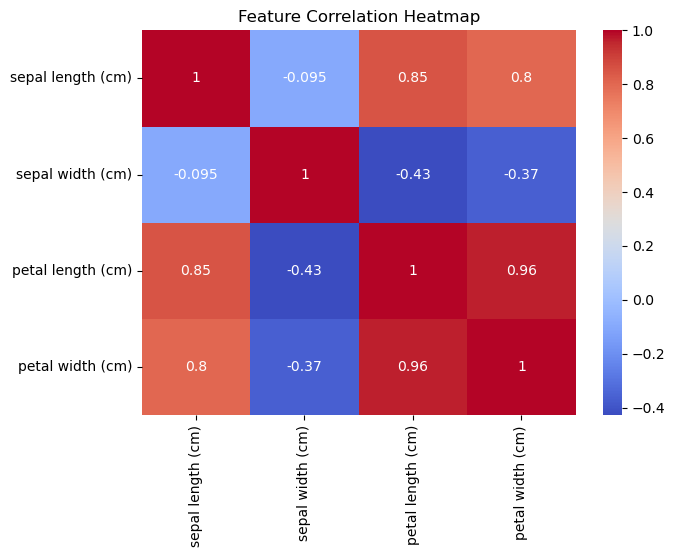

In [9]:
# Correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(pd.DataFrame(X_scaled_df, columns=iris.feature_names).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [10]:
# Combine processed features and target
processed_df = pd.concat([X_scaled_df, df[['target_encoded']]], axis=1)
processed_df.to_csv("iris_preprocessed.csv", index=False)

print("✅ Preprocessed data saved successfully as 'iris_preprocessed.csv'")


✅ Preprocessed data saved successfully as 'iris_preprocessed.csv'


In [11]:
print("SUMMARY OF TRANSFORMATIONS:\n")
print("- Missing values handled using mean imputation")
print("- Target encoded using LabelEncoder")
print("- Features scaled using StandardScaler")
print("- PCA reduced dimensions (95% variance retained)")
print("- Feature selection via VarianceThreshold & SelectKBest")
print("- Correlation analysis performed")
print("- Cleaned dataset saved to 'iris_preprocessed.csv'")


SUMMARY OF TRANSFORMATIONS:

- Missing values handled using mean imputation
- Target encoded using LabelEncoder
- Features scaled using StandardScaler
- PCA reduced dimensions (95% variance retained)
- Feature selection via VarianceThreshold & SelectKBest
- Correlation analysis performed
- Cleaned dataset saved to 'iris_preprocessed.csv'


In [12]:
# Ethical discussion
print("ETHICAL CONCERNS:")
print("""
If the dataset had sensitive features such as Gender or Marital Status, 
it could introduce bias in model predictions. 
To mitigate bias:
1. Exclude or anonymize sensitive attributes.
2. Evaluate fairness metrics (e.g., disparate impact).
3. Apply reweighting or resampling to balance data across groups.
4. Document and justify feature inclusion transparently.
""")


ETHICAL CONCERNS:

If the dataset had sensitive features such as Gender or Marital Status, 
it could introduce bias in model predictions. 
To mitigate bias:
1. Exclude or anonymize sensitive attributes.
2. Evaluate fairness metrics (e.g., disparate impact).
3. Apply reweighting or resampling to balance data across groups.
4. Document and justify feature inclusion transparently.

